# Setting Up the Problem

#### Objective: Understand and establish the baseline for your chosen dataset

In [1]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00


In [ ]:
# imports for Part I
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## OWN FUNCTIONS
# import support_functions
# from support_functions import *

In [ ]:
# imports for Part II
! pip install transformers==4.37.2
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
from sklearn.metrics import confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from tqdm import tqdm
from tensorflow.keras.optimizers import Adam


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from transformers import TFDistilBertModel
from keras.utils import custom_object_scope
from keras.models import load_model
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datasets import load_dataset
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import spacy
sp = spacy.load('en_core_web_sm')
from nltk.corpus import wordnet

In [ ]:
df = load_dataset("carblacac/twitter-sentiment-analysis")

### Characteristics of the dataset

**b. Dataset Description (0.5 points): Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.**

##### TSATC: Twitter Sentiment Analysis Training Corpus     
Original DATASET contains 1,578,627 classified tweets (1 for positive and 0 for negative sentiment).

Our dataset has already been randomly sampled, cleaned, and split into training and testing sets. Both positive and negative classes are well balanced within each subset, and the training subset has been further divided into an 80% training set and a 20% validation set.  

This dataset is an aggregation of two twitter sentiment analysis datasets:  
- University of Michigan Sentiment Analysis competition on Kaggle: https://inclass.kaggle.com/c/si650winter11  
- Twitter Sentiment Corpus by Niek Sanders: http://www.sananalytics.com/lab/twitter-sentiment/

  
Languages: English

In [ ]:
## Defining train, validation and test sets
train_data = df['train']['text']
train_labels = df['train']['feeling']

validation_data = df['validation']['text']
validation_labels = df['validation']['feeling']

test_data = df['test']['text']
test_labels = df['test']['feeling']

# Define the percentage of data to use
sample_percentage = 0.3

# Sample 30% of the train data
sample_size = int(len(train_data) * sample_percentage)
train_sample_indices = random.sample(range(len(train_data)), sample_size)
train_data = [train_data[i] for i in train_sample_indices]
train_labels = [train_labels[i] for i in train_sample_indices]

# Sample 30% of the validation data
sample_size = int(len(validation_data) * sample_percentage)
validation_sample_indices = random.sample(range(len(validation_data)), sample_size)
validation_data = [validation_data[i] for i in validation_sample_indices]
validation_labels = [validation_labels[i] for i in validation_sample_indices]

# Sample 30% of the test data
sample_size = int(len(test_data) * sample_percentage)
test_sample_indices = random.sample(range(len(test_data)), sample_size)
test_data = [test_data[i] for i in test_sample_indices]
test_labels = [test_labels[i] for i in test_sample_indices]

## Creating Dataframes
df_train = pd.DataFrame({'text':train_data,'label':train_labels})
df_val = pd.DataFrame({'text':validation_data,'label':validation_labels})
df_test = pd.DataFrame({'text':test_data,'label':test_labels})

df

### Dataset size

In [ ]:
total_rows = len(train_labels) + len(test_labels) + len(validation_labels)
# Calculate train size including validation
Train_size = len(train_labels) + len(validation_labels)
# Calculate Summary
summary_df = pd.DataFrame({'SET': ['TRAIN','TEST', 'TOTAL'], 'ROWS': [Train_size, len(test_labels), total_rows], 'SPLIT': [Train_size/total_rows, len(test_labels)/total_rows,total_rows/total_rows]})
print('Dataset Split [TRAIN, TEST]')
display(summary_df.round(3))

## TRAIN SPLIT
summary_df_train = pd.DataFrame({'SET': ['train','validation', 'TRAIN'], 'ROWS': [len(train_labels), len(validation_labels), Train_size], 'SPLIT': [len(train_labels)/Train_size, len(validation_labels)/Train_size,Train_size/Train_size]})
print('TRAIN Split [train, validation]')
display(summary_df_train.round(3))

### Class distribution

In [ ]:
# ## Class balance of our datasets
# print('train')
# class_prop(train_labels)
# print('validation')
# class_prop(validation_labels)
# print('test')
# class_prop(test_labels)

### Distribution of text lengths (train set only)

In [ ]:
df_train['text_length']= [len(i.split()) for i in df_train['text']]
df_val['text_length']= [len(i.split()) for i in df_val['text']]
df_test['text_length']= [len(i.split()) for i in df_test['text']]
#Calculating Answer Length

In [ ]:
for i in df_train['text'][0:5]:
    print(i.split(),'length: ', len(i.split()) )

In [ ]:
## Summary statistics for text_length
# Calculate multiple statistics
print('Summary Statistics of text_length for positive(1) and negative(0) tweets')
statistics = df_train.groupby('label')['text_length'].agg(['mean', 'median','std', 'min', 'max'])
# Display the result
print(statistics)

print('   ')

print('Plot text_length distribution for positive(1) and negative(0) tweets')
sns.boxplot(data=df_train, x='label', y='text_length',hue = 'label')
#plt.xlim(0, None)
plt.xticks(rotation=45, ha='right')
# Add a horizontal line at the mean of 'reply_length'
mean_reply_length = df_train['text_length'].mean()
plt.axhline(y=mean_reply_length, color='red', linestyle='--', label=f'Mean text Length ({mean_reply_length:.2f})')
# Show the plot
plt.show()

## Data Cleaning
Twitter text requires multiple transformations prior to Preprocessing

In [ ]:
! pip install ekphrasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons


# Create a TextPreProcessor instance
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
               'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
              'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used for word segmentation
    segmenter="twitter",
    # corpus from which the word statistics are going to be used for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text, with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons],
    #Remove emoticon
    pre_processor=[lambda x: x.replace('＼(^o^)／', '')]
)

# Pre-process the sentence using TextPreProcessor

def extract_clean(text):
    cleaned_text = ' '.join([word.split('<')[0] for word in text])
    return cleaned_text

def extract_emotions(text):
    emoji_expressions = [token for token in text if token in emoticons.values()]
    return emoji_expressions

def clean_string(text):
    cleaned_text = re.sub(r'\s+', ' ', text)
    cleaned_text = cleaned_text.strip()
    return cleaned_text

def flatten_emotions(emotion_list):
    # Convert the list of emotions into a string
    emotion_string = ', '.join(emotion_list)
    # Use regular expression to find all words inside angle brackets
    emotions = re.findall(r'<([^>]*)>', emotion_string)
    unique_emotions = list(set(emotions))
    combined_emotions = ', '.join(unique_emotions)
    return combined_emotions


def clean_text(df):
# Pre-process all the sentences in df_train['text']
    df['preprocessed_text'] = [text_processor.pre_process_doc(text) for text in df['text']]
    df['clean_text'] = df['preprocessed_text'].apply(extract_clean).apply(clean_string)

    #Getting Hashtags
    df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
    df['hashtag'] = [' '.join(i) for i in df['hashtag']]

    # Iterate through the preprocessed text
    df['emotions'] = df['preprocessed_text'].apply(extract_emotions)
    df['clean_emotions'] = df['emotions'].apply(flatten_emotions)

    df = df[['text','label','text_length','clean_text','clean_emotions','hashtag']]
    return df

df_train = clean_text(df_train)
df_val = clean_text(df_val)
df_test = clean_text(df_test)


## DATA EXPLORATION

#### Hashtags

- 98% of the tweets have no hashtags. Most likely they have been already cleaned.
- Doesn't make sense to keep diving for more insigths.

In [ ]:
# hashtag_freq = freq_table(df_train,'hashtag')
# hashtag_freq = hashtag_freq.sort_values(by='perc',ascending=False)
# hashtag_freq['accum'] = hashtag_freq['perc'].cumsum()
# print('top 10 hashtags')
# display(hashtag_freq[0:10])

#### EMOTIONS

- 98% of the tweets have no emotions. Most likely have been already removed.
- Because they directly express the sentiment of the text, we'll concatenate them to our cleaned tweet corpus.

In [ ]:
# emotions_freq = freq_table(df_train,'clean_emotions')
# emotions_freq = emotions_freq.sort_values(by='perc',ascending=False)
# emotions_freq['accum'] = emotions_freq['perc'].cumsum()
# print('top 10 emotions')
# display(emotions_freq[0:10])

In [ ]:
#Concatenate text with emotions
df_train['text_emotion'] = df_train['clean_text']+' '+df_train['clean_emotions']
df_val['text_emotion'] = df_val['clean_text']+' '+df_val['clean_emotions']
df_test['text_emotion'] = df_test['clean_text']+' '+df_test['clean_emotions']


### Preprocessor

In [ ]:
#Defining preprocessing class to be included in Pipeline later.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


## Text mining - Preprocessing, CountVectorizing and tf-idf

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = []
        for text in X:
            # Convert text to lowercase
            text = text.lower()
            # Tokenize text
            tokens = word_tokenize(text)
            # Remove stopwords and apply lemmatization
            filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words]
            # Join tokens back into a string
            preprocessed_text = ' '.join(filtered_tokens)
            preprocessed_texts.append(preprocessed_text)

        return preprocessed_texts


#### Exploring positive and negative words using WordCloud

In [ ]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from collections import defaultdict
# from nltk.corpus import stopwords

# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))


# labels = {0: 'negative', 1: 'positive'}

# # Prepare data for wordclouds
# label_data = defaultdict(lambda: '')

# for text, label in zip(df_train['clean_text'], df_train['label']):
#     label_data[label] += text

# # Generate and plot wordclouds for each label
# fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Create 2x2 subplots
# axs = axs.flatten()  # Flatten the axis array

# for ax, (label, text) in zip(axs, label_data.items()):
#     wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
#     ax.imshow(wordcloud, interpolation='bilinear')
#     ax.set_title('WordCloud for Label {}'.format(labels.get(label)))
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

## Exploring positive and negative words using Countvectorizer + TF-IDF

In [ ]:
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train['text_emotion'])

# Transform the validation data using the fitted pipeline
train_tfidf = pipeline.transform(df_train['text_emotion'])
validation_tfidf = pipeline.transform(df_val['text_emotion'])
test_tfidf = pipeline.transform(df_test['text_emotion'])


# Exploring
train_tfidf=train_tfidf.toarray()
print("document term matrix has size", train_tfidf.shape)
#print(pipeline.named_steps['vect'].get_feature_names_out())

In [ ]:
df_train

## Random Classifier Performance

Random Classifier Performance (0.25 points): Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an implementation.

**pending**: include preprocessing in the pipeline to properly treat tweets.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
class Metrics:
    def __init__(self):
        self.results = {}

    def run(self, y_true, y_pred, method_name, average='macro'):
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average=average)
        recall = recall_score(y_true, y_pred, average=average)
        f1 = f1_score(y_true, y_pred, average=average)

        # Store results
        self.results[method_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
        }

    def plot(self):
        # Create subplots
        fig, axs = plt.subplots(2, 2, figsize=(15, 10))

        # Plot each metric
        for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
            ax = axs[i//2, i%2]
            values = [res[metric] * 100 for res in self.results.values()]
            ax.bar(self.results.keys(), values)
            ax.set_title(metric)
            ax.set_ylim(0, 100)

            # Add values on the bars
            for j, v in enumerate(values):
                ax.text(j, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

            # Rotate x ticks vertically
            ax.tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Create a pipeline with TF-IDF and Logistic Regression
# pipeline = Pipeline([
#     ('prepro', TextPreprocessor()),
#     ('tfidf', TfidfVectorizer(ngram_range=(1, 2),
#                               min_df=5,
#                               stop_words='english')),
#     ('clf', LogisticRegression(solver='liblinear')),
# ])

# # Fit the pipeline on the training data
# pipeline.fit(train_data, train_labels)

# valid_preds = pipeline.predict(validation_data)

# metrics_val= Metrics()
# metrics_val.run(validation_labels, valid_preds, "basic-TF-IDF")
# metrics_val.plot()

## Baseline Implementation

Baseline Implementation (0.5 points): Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

In [ ]:
# from spacy.matcher import Matcher
# from spacy.matcher import PhraseMatcher
# import spacy

# #python -m spacy download en_core_web_sm - Run on Terminal
# nlp = spacy.load("en_core_web_sm")

# # Create a new Matcher
# matcher = Matcher(nlp.vocab)

In [ ]:
# ##SKELETON for Rule-based classifier

# positive_patterns = [
#     [{"LOWER": "good"}]
#     # Add more patterns as needed
#     ]

# negative_patterns = [
#     [{"LOWER": "bad"}]
#     # Add more patterns as needed
#     ]

# matcher.add("positive_patterns", positive_patterns)
# matcher.add("negative_patterns", negative_patterns)


# BERT Model with Limited Data (0.5 points)

#### Train a BERT-based model using only 32 labeled examples and assess its performance.

In the following exercises we will work with clean text.

In [ ]:
train_data_clean = df_train['clean_text']
validation_data_clean = df_val['clean_text']
test_data_clean = df_test['clean_text']

In [ ]:
# Set the seed for reproducibility
np.random.seed(42)

# First, we'll select 32 random rows from the DataFrame using the sample method.
df_train_32 = df_train.sample(n=32)

In [ ]:
train_data_32 = df_train_32['clean_text']
train_labels_32 = df_train_32['label']

### BERT SETUP

In [ ]:
checkpoint="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = TFAutoModel.from_pretrained(checkpoint)

batch_size=32 # impossible to have bigger batch as far as we have just 32 observations in the train
max_length=40 # fine for the length of the sentences in our dataset - changed it according to the distribution
rate = 0.5 # dropout parameters - tried different options, 0.5 still performs better
num_labels = len(np.unique(validation_labels))

In [ ]:
# ## Input
# input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
# input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# # Embedding layers
# embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# # we need only the first token representation nothing else from the last layer
# final_embedding_layer = embedding_layer[0] #last layer of BERT
# # Extract only the [CLS] token's embeddings
# cls_token_embeddings = final_embedding_layer[:, 0, :]
# # First dimension is the number of rows
# # Second dimension is the number of tokens (in our case 64)
# # The last dimension is the embedding size, in this case 768

# # Let's add some dropout to reduce overfitting
# output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# # One dense layer to process the last layer
# output = tf.keras.layers.Dense(num_labels,
#                                kernel_initializer="glorot_uniform",
#                                activation='softmax')(output_layer)


# bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = output)

# bert_model.summary()

In [ ]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras import regularizers

## Input
input_ids_in = tf.keras.layers.Input(shape=(max_length,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_length,), name='masked_token', dtype='int32')

# Embedding layers
embedding_layer = model(input_ids=input_ids_in, attention_mask=input_masks_in)
# we need only the first token representation nothing else from the last layer
final_embedding_layer = embedding_layer[0] #last layer of BERT
# Extract only the [CLS] token's embeddings
cls_token_embeddings = final_embedding_layer[:, 0, :]
# First dimension is the number of rows
# Second dimension is the number of tokens (in our case 64)
# The last dimension is the embedding size, in this case 768

# Let's add some dropout to reduce overfitting
output_layer = tf.keras.layers.Dropout(rate, name='do_layer')(cls_token_embeddings)

# One dense layer to process the last layer with L2 regularization
output = tf.keras.layers.Dense(num_labels,
                               kernel_initializer="glorot_uniform",
                               activation='softmax',
                               kernel_regularizer=regularizers.l2(0.01))(output_layer)

bert_model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs=output)

bert_model.summary()

In [ ]:
def get_batches(X_train, y_train, tokenizer, batch_size, max_length):
    """
    Objective: Create a generator that yields batches of tokenized text and corresponding labels.
               The data is shuffled and looped through indefinitely.

    Inputs:
        - X_train (np.array): Array of text data (features).
        - y_train (np.array): Array of labels.
        - tokenizer (DistilBertTokenizer): Tokenizer for text data.
        - batch_size (int): Size of each batch.
        - max_length (int): Maximum length of tokenized sequences.
    Outputs:
        - Generator yielding batches of (inputs, targets).
    """

    # Pre-tokenize the entire dataset
    inputs = tokenizer.batch_encode_plus(list(X_train), add_special_tokens=True, max_length=max_length,
                                         padding='max_length', return_attention_mask=True,
                                         return_token_type_ids=True, truncation=True,
                                         return_tensors="np")

    input_ids = np.asarray(inputs['input_ids'], dtype='int32')
    attention_masks = np.asarray(inputs['attention_mask'], dtype='int32')

    # Shuffle and yield batches
    while True:
        X_train, y_train, input_ids, attention_masks = shuffle(X_train, y_train, input_ids, attention_masks, random_state=11)

        for i in range(0, len(X_train), batch_size):
            yield [input_ids[i:i + batch_size], attention_masks[i:i + batch_size]], y_train[i:i + batch_size]

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(train_labels_32).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(train_data_32)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)


In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data_clean),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


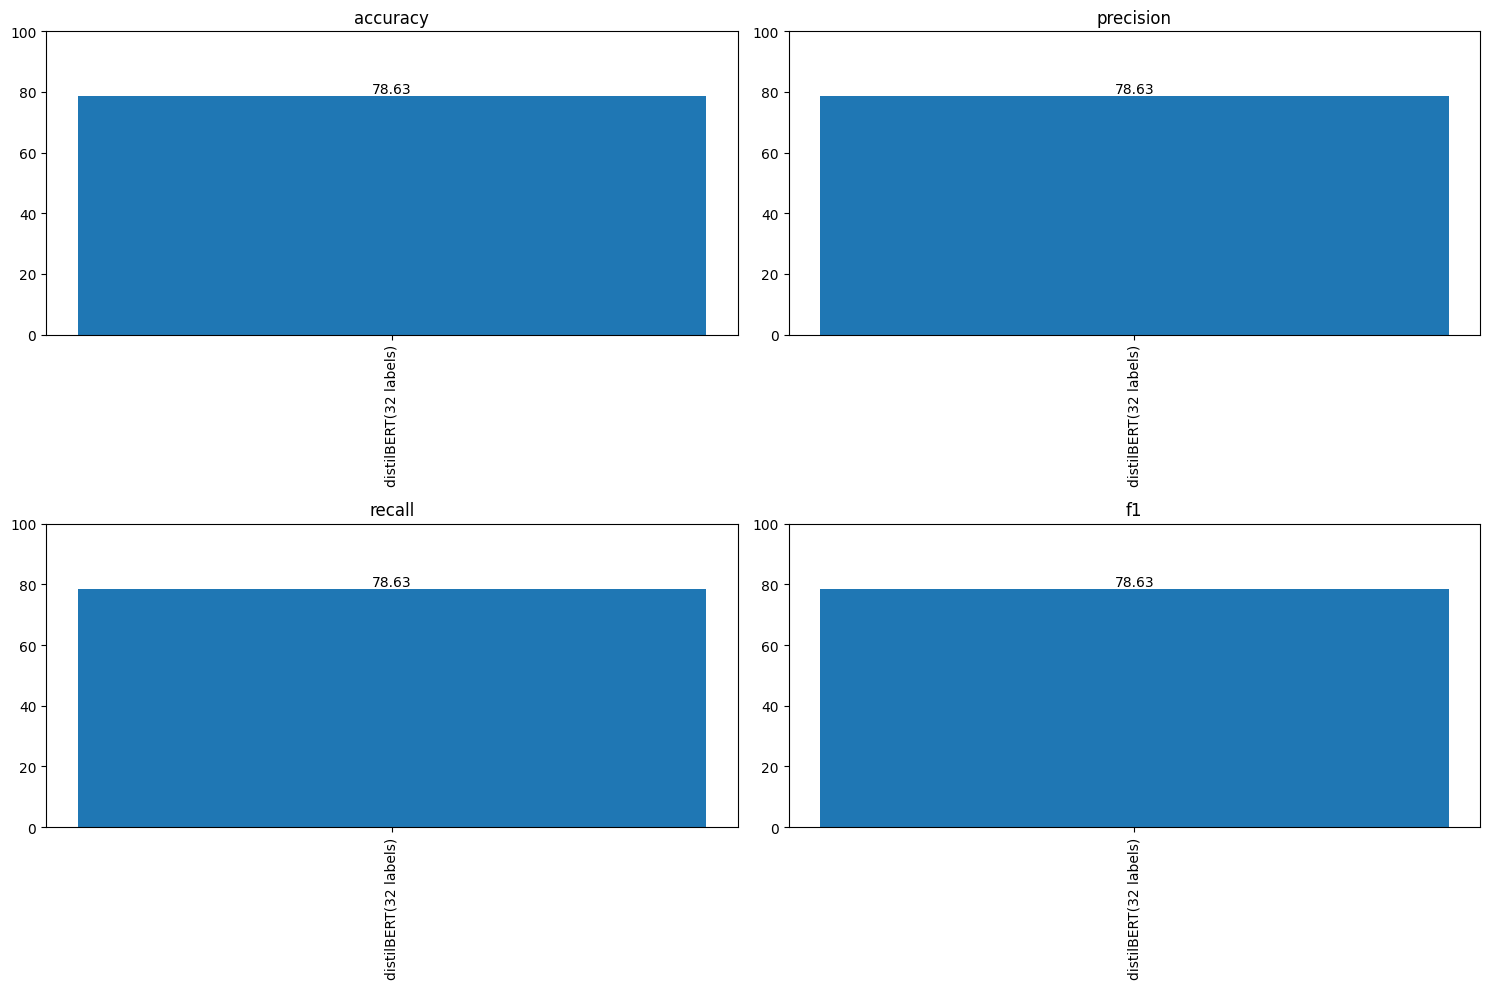

In [ ]:
# get the final metrics
metrics_val= Metrics()
metrics_val.run(test_labels, valid_preds, "distilBERT(32 labels)")
metrics_val.plot()

As we see, BERT trained on 32 labels performs slightly better than random. Note that metrics vary in the range [0.52, 0.62], depending on the run, as all batches are randomly assigned.

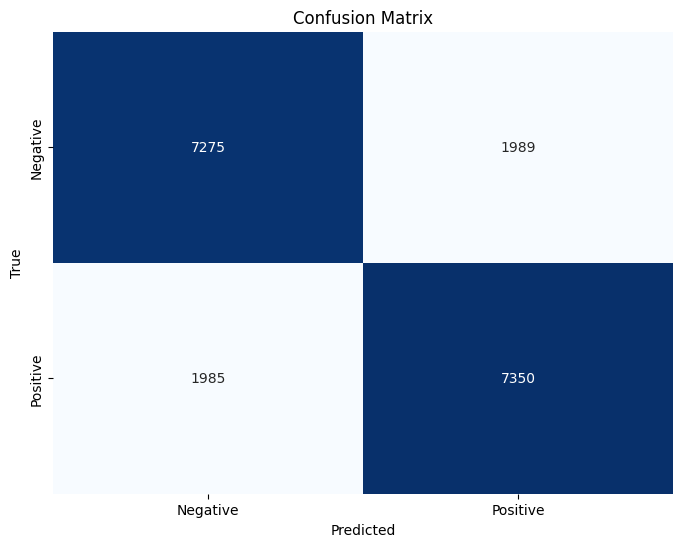

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, valid_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Dataset Augmentation (1 point)

#### Experiment with an automated technique to increase your dataset size without using LLMs. Evaluate the impact on model performance.

In [ ]:
# This function should be moved to the top of the notebook (Mikel used it in the first exercise)
# Function for data preprocessing

#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### LDA
I performed some exploratory analysis (aka LDA), but as far as data is very small and randomly chosen to find any patterns is almost imposible and actually is not needed. Probably will just drop this part.

In [ ]:
# df_train_32['clean_text_tok'] = [tokenize(text, 2) for text in df_train_32['clean_text']]

In [ ]:
# cv = CountVectorizer(ngram_range = (1,2), lowercase=True, stop_words='english')

# cv.fit(df_train_32['clean_text_tok'])

# vectorized_text=cv.transform(df_train_32['clean_text_tok'])
# vectorized_text=vectorized_text.toarray()
# print("document term matrix has size", vectorized_text.shape)

In [ ]:
# dtm_sparse = csr_matrix(vectorized_text)

# # Convert sparse matrix to gensim corpus
# corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# # Create gensim dictionary from sklearn CountVectorizer vocabulary
# vocabulary_gensim = {}
# for key, val in cv.vocabulary_.items():
#     vocabulary_gensim[val] = key

# dictionary = corpora.Dictionary()
# dictionary.id2token = vocabulary_gensim
# dictionary.token2id = cv.vocabulary_

In [ ]:
# # Number of topics
# num_topics = 5

# # Custom alpha value
# alpha = [0.1] * num_topics

# # Build LDA model
# lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=42, alpha=alpha)

# # Display the topics
# topics = lda_model.print_topics(num_words=30)
# print("Custom Alpha and Eta:")
# for topic in topics:
#     print(topic)


Text data augmentation approaches include:

+ Synonym Replacement: Replace words with their synonyms.
+ Random Insertion: Insert random words into the text.
+ Random Deletion: Randomly delete words from the text.
+ Random Swap: Swap two words randomly in the text.
+ Text Masking: Replace words or phrases with a mask token.

As far as we have very small dataset (DTM is of shape 32:305) I chose not to work with deletion or masking, but rather with synonyms. I thought of two approaches to do so:

### Data Augmentation: Manually Gathered Synonyms

First approach was to analyse the most common words associated with positive and negative sentiments and manually create a dictionary with synonyms. Then, I augmented data with 50 (tried more, but performance was worse, probably bacause of the limited variety of the changes and the fact, that probably misclassified observations could be misclassified now twice) observations and trained the same BERT with augmented data.

In [ ]:
# I had slightly different approach, but changed it to Mikel's so to have the same logic throughout the notebook. Will have to move this and next cell to the first exercise later on.
## Preprocessing texts
pipeline = Pipeline([
        ('prepro', TextPreprocessor()),
        ("vect", CountVectorizer(ngram_range=(1, 2), min_df=0.005, max_df=0.97)),
        ("tfidf", TfidfTransformer(use_idf=True, norm='l1'))
    ]
)

# Fit the pipeline on the training data
pipeline.fit(df_train_32['clean_text'])

Pipeline(steps=[('prepro', TextPreprocessor()),
                ('vect',
                 CountVectorizer(max_df=0.97, min_df=0.005,
                                 ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(norm='l1'))])

In [ ]:
def tfidf_term(pipeline,df,sentiment):
# Access the CountVectorizer step from the pipeline
    count_vectorizer = pipeline.named_steps['vect']
    # Fit and transform the data
    tf_idf_pos_matrix = pipeline.transform(df[df['label']==sentiment]['clean_text'])
    # Convert count matrix to DataFrame
    vec_fr_mtx = pd.DataFrame(data=tf_idf_pos_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

    #Creating a dictionary of frequencies for our terms
    feature_names = count_vectorizer.get_feature_names_out()
    # Calculate Term frequency dictionary
    term_tfidf = np.mean(vec_fr_mtx, axis=0)
    #Store in a dictionary
    tfidf_dict = {i: n for i, n in zip(feature_names, term_tfidf)}
    print(len(term_tfidf))
    return feature_names, term_tfidf, tfidf_dict


def transform_to_dataframe(feature_names, score):
    # Create DataFrame with feature names and mean TF-IDF scores
    df = pd.DataFrame({'terms': feature_names, 'score': score})
    # Reset index
    df.reset_index(drop=True, inplace=True)
    return df


# Example usage:
def plot_freq_top(df,top,pos):
    df = df.sort_values(by='score',ascending = False)
    df = df.head(top)
    #We are going to set the

    # Plot the top N terms and their TF-IDF scores
    plt.figure(figsize=(10, 6))
    plt.barh(df['terms'], df['score'], align='center')
    plt.yticks(df['terms'])
    plt.xlabel('Frequency Score')
    plt.title(pos.format(top))
    #plt.xlim(0,0.010)
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()

322


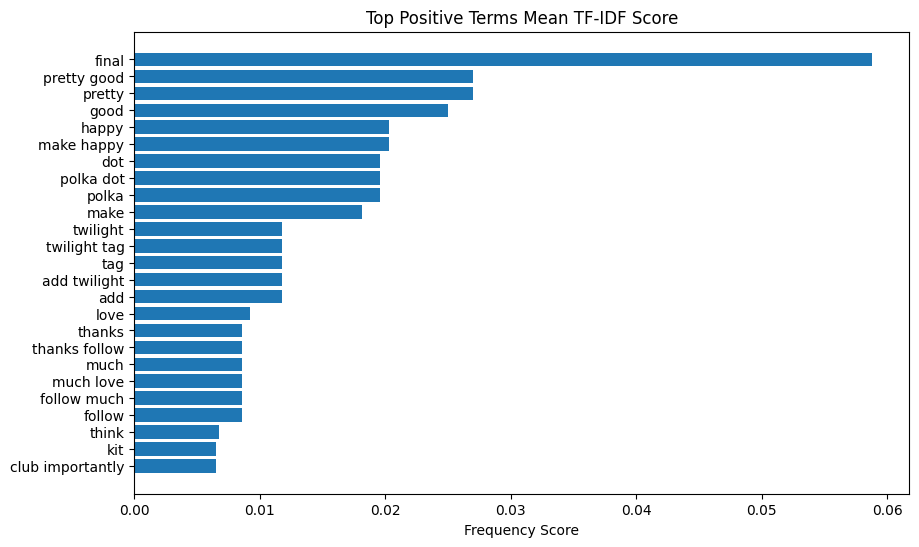

In [ ]:
pos = f'Top Positive Terms Mean TF-IDF Score'
## Posive Terms
pos_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,1)
pos_tf_idf = transform_to_dataframe(pos_feature_names,term_tfidf)
plot_freq_top(pos_tf_idf,25,pos)

322


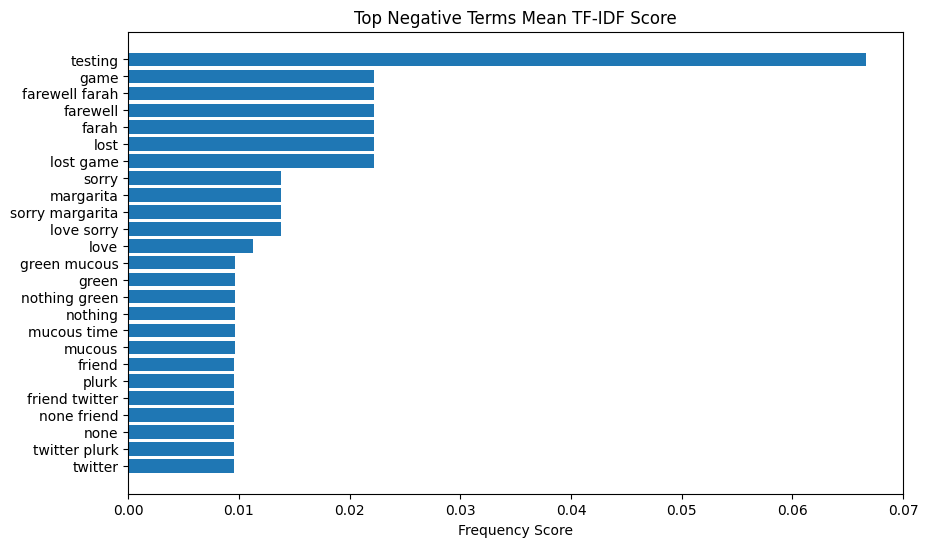

In [ ]:
neg = f'Top Negative Terms Mean TF-IDF Score'
## Posive Terms
neg_feature_names, term_tfidf, tfidf_dict = tfidf_term(pipeline,df_train_32,0)
neg_tf_idf = transform_to_dataframe(neg_feature_names,term_tfidf)
plot_freq_top(neg_tf_idf,25,neg)

I got top 'most positive' and 'most negative' terms, manually chose some of them and assigned synonyms.

In [ ]:
# Sort the dataframe by the 'score' column in decreasing order
neg_tf_idf_sorted = neg_tf_idf.sort_values(by='score', ascending=False)
pos_tf_idf_sorted = pos_tf_idf.sort_values(by='score', ascending=False)

# Extract the top 25 terms from the sorted dataframe
top_terms_neg = neg_tf_idf_sorted['terms'].head(25).tolist()
top_terms_pos = pos_tf_idf_sorted['terms'].head(25).tolist()

# Print the list of top 25 terms
print(top_terms_neg)
print(top_terms_pos)

['testing', 'game', 'farewell farah', 'farewell', 'farah', 'lost', 'lost game', 'sorry', 'margarita', 'sorry margarita', 'love sorry', 'love', 'green mucous', 'green', 'nothing green', 'nothing', 'mucous time', 'mucous', 'friend', 'plurk', 'friend twitter', 'none friend', 'none', 'twitter plurk', 'twitter']
['final', 'pretty good', 'pretty', 'good', 'happy', 'make happy', 'dot', 'polka dot', 'polka', 'make', 'twilight', 'twilight tag', 'tag', 'add twilight', 'add', 'love', 'thanks', 'thanks follow', 'much', 'much love', 'follow much', 'follow', 'think', 'kit', 'club importantly']


In [ ]:
synonyms = {
    'school': ['education', 'academy'],
    'complicated': ['complex', 'difficult'],
    'bad': ['poor', 'negative', 'awful', 'lousy', 'rough'],
    'love': ['affection', 'adore', 'care for', 'like'],
    'guilty': ['regret', 'remorse'],
    'feel': ['emotion', 'vibe'],
    'oh': ['ah', 'ahh', 'oops'],
    'miss': ['long for', 'crave', 'feel loss'],
    'going': ['departing', 'leaving', 'traveling'],
    'dear': ['beloved', 'darling', 'precious'],
    'busy': ['occupied', 'engaged'],
    'working': ['laboring', 'employed'],
    'time': ['period', 'duration', 'interval'],
    'would': ['could', 'might', 'will'],
    'look': ['gaze', 'observe', 'glance'],
    'bed time': ['sleep time', 'rest time', 'night time'],
    'song': ['music', 'melody', 'tune'],
    'hi': ['hello', 'hey', 'greetings'],
    'love song': ['romantic music', 'passionate tune'],
    'want': ['desire', 'wish for', 'crave'],
    'please': ['kindly', 'if you please'],
}

In [ ]:
# Function to replace key word with a random synonym
def replace_with_synonym(text, synonyms_dict):
    words = text.split()
    for i, word in enumerate(words):
        if word in synonyms_dict:
            synonyms = synonyms_dict[word]
            # Randomly select a synonym
            new_word = random.choice(synonyms)
            # Replace the key word with the selected synonym
            words[i] = new_word
    return ' '.join(words)

# Initialize an empty DataFrame to store new observations
new_rows = pd.DataFrame(columns=df_train_32.columns)

# Generate additional 50 rows
while len(new_rows) < 50:
    # Identify rows with words from synonyms dictionary
    relevant_rows = df_train_32[df_train_32['clean_text'].apply(lambda x: any(word in synonyms for word in x.split()))]
    # Duplicate each relevant row and replace key word with synonym
    for idx, row in relevant_rows.iterrows():
        new_row = row.copy()
        new_row['clean_text'] = replace_with_synonym(row['clean_text'], synonyms)
        new_rows = new_rows.append(new_row, ignore_index=True)
        if len(new_rows) >= 50:
            break

# Display the new DataFrame with 50 new rows
print(new_rows)


                                                 text label text_length  \
0   @noirem I read it a long time ago but I don't ...     1          23   
1   @raamdev I'll practice with you!  Irene might ...     1          19   
2   I have 1742 message in my gustbook at www.dogu...     1          17   
3               nothing but green mucous all the time     0           7   
4   @princessPK420 we love you too sorry you can't...     0          13   
5      @design_group thanks for the follow! much love     1           7   
6   @dukefan112 even feel like June yet, i still f...     0          21   
7   @JoeTheProducer seriously, go out on the town ...     1          27   
8   @noirem I read it a long time ago but I don't ...     1          23   
9   @raamdev I'll practice with you!  Irene might ...     1          19   
10  I have 1742 message in my gustbook at www.dogu...     1          17   
11              nothing but green mucous all the time     0           7   
12  @princessPK420 we lov

<ipython-input-132-5dc4f9f0cb87>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


In [ ]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame shape
print(augmented_df.shape)

(82, 7)


In [ ]:
# Define data and labels
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

Note, that we will work with the same BERT model, so I will not change anything in the model architecture.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

from keras.callbacks import EarlyStopping
bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# # Now, pass the wrapped generator to fit
history = bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)




Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/7




Epoch:  50%|█████     | 1/2 [00:24<00:24, 24.29s/it]

1/2 [==============>...............] - ETA: 38s - loss: 0.1246 - recall_2: 0.9688 - precision_2: 0.9688



Epoch: 3it [00:38, 11.46s/it]                       

2/2 [==============================] - 39s 420ms/step - loss: 0.2146 - recall_2: 0.9219 - precision_2: 0.9219
Epoch 2/7




Epoch: 4it [00:38,  7.64s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0463 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 5it [00:38,  5.18s/it]

2/2 [==============================] - 0s 268ms/step - loss: 0.1348 - recall_2: 0.9400 - precision_2: 0.9400
Epoch 3/7




Epoch: 6it [00:39,  3.60s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0622 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 7it [00:39,  2.56s/it]

2/2 [==============================] - 0s 212ms/step - loss: 0.1466 - recall_2: 0.9800 - precision_2: 0.9800
Epoch 4/7




Epoch: 8it [00:39,  1.83s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0104 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 9it [00:39,  1.35s/it]

2/2 [==============================] - 1s 272ms/step - loss: 0.0100 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 5/7




Epoch: 10it [00:40,  1.02s/it]

1/2 [==============>...............] - ETA: 0s - loss: 0.0205 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 11it [00:40,  1.29it/s]

2/2 [==============================] - 0s 269ms/step - loss: 0.0108 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 6/7




Epoch: 12it [00:40,  1.61it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.0025 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 13it [00:40,  1.94it/s]

2/2 [==============================] - 0s 172ms/step - loss: 0.0052 - recall_2: 1.0000 - precision_2: 1.0000
Epoch 7/7




Epoch: 14it [00:41,  2.42it/s]

1/2 [==============>...............] - ETA: 0s - loss: 0.0013 - recall_2: 1.0000 - precision_2: 1.0000



Epoch: 15it [00:41,  2.73it/s]

2/2 [==============================] - 1s 278ms/step - loss: 0.0012 - recall_2: 1.0000 - precision_2: 1.0000


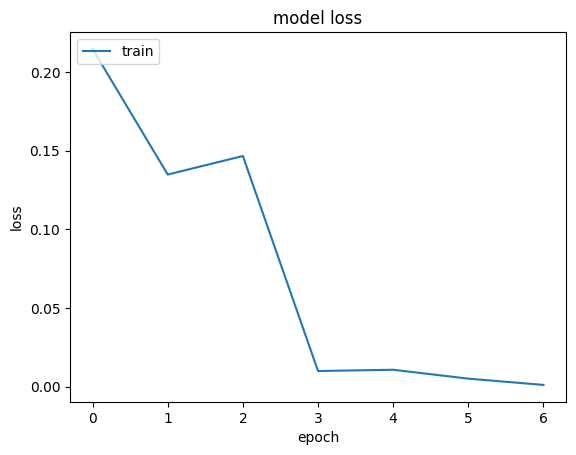

In [ ]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


582/582 [==============================] - 54s 87ms/step


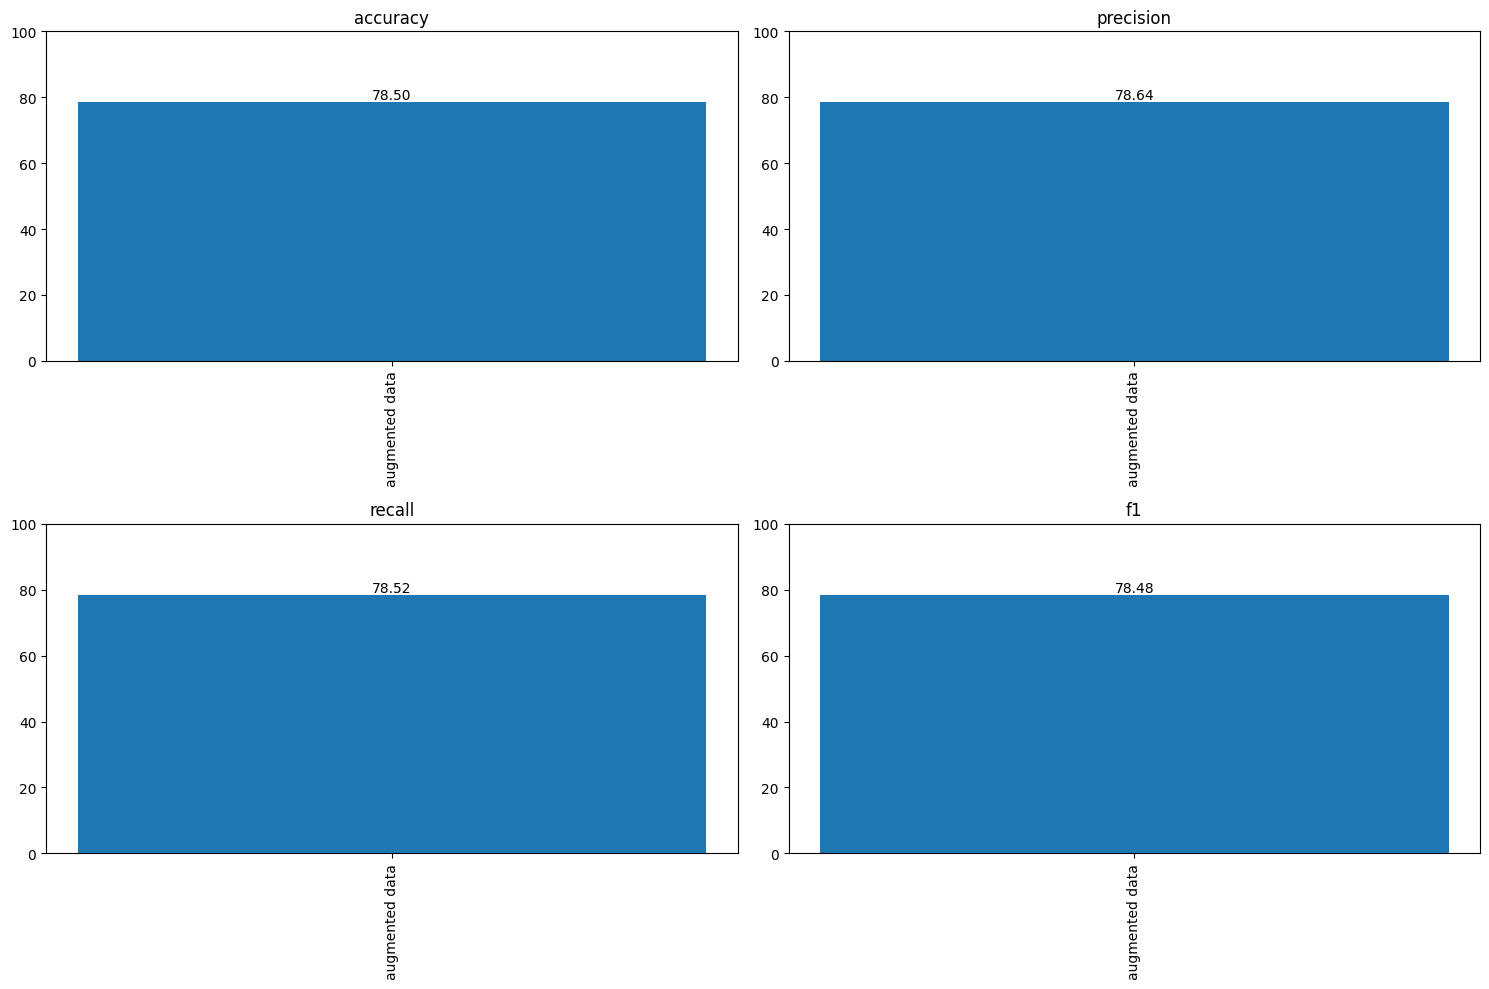

In [ ]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data")
metrics_val.plot()

### Data Augmentation: Synonyms from WordNet

I didn't choose to work with WordNet packages in the beginning, as far as synonyms look kind of random and don't usually properly reflect the meaning of the word (probably because of multiple meanings) and don't consider the context. But as far as I couldn't manually assign synonyms to all (or at least many) tokens, I decided to try WordNet as well.

So the second approach is to rendomly change 30% of the tokens in the comments (I tried different shares, 30% performed better) and add 32*20 (tried different numbers as well) new rows.

In [ ]:
# Function to get synonyms from WordNet
def get_wordnet_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to replace random words with WordNet synonyms
def replace_with_synonym_wordnet(text):
    words = text.split()
    for i, word in enumerate(words):
        # Randomly decide whether to replace the word with a synonym
        if random.random() < 0.3:  # Adjust the probability as needed
            # Get WordNet synonyms for the word
            synonyms = get_wordnet_synonyms(word)
            if synonyms:
                # Randomly select a synonym
                new_word = random.choice(synonyms)
                # Replace the word with the selected synonym
                words[i] = new_word
    return ' '.join(words)

# Duplicate each row and replace random words with WordNet synonyms
new_rows = pd.DataFrame(columns=df_train_32.columns)
for idx, row in df_train_32.iterrows():
    for _ in range(20):  # Duplicate 20 times - can be adjusted as needed
        # Duplicate the row
        new_row = row.copy()
        # Replace random words in the 'clean_text' column with WordNet synonyms
        new_row['clean_text'] = replace_with_synonym_wordnet(row['clean_text'])
        # Append the new row to the DataFrame
        new_rows = new_rows.append(new_row, ignore_index=True)

# Display the new DataFrame with duplicated rows and random word replacements
print(new_rows.head())


<ipython-input-140-a44f8c0859a0>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = new_rows.append(new_row, ignore_index=True)


                                                text label text_length  \
0  Ever something unbelievable, strange or weird ...     1          18   
1  Ever something unbelievable, strange or weird ...     1          18   
2  Ever something unbelievable, strange or weird ...     1          18   
3  Ever something unbelievable, strange or weird ...     1          18   
4  Ever something unbelievable, strange or weird ...     1          18   

                                          clean_text clean_emotions hashtag  \
0  ever something unbelievable , strange or weird...                          
1  ever something unbelievable , strange or Weird...                          
2  e'er something unbelievable , strange or weird...                          
3  always something unbelievable , strange or wei...                          
4  ever something unbelievable , strange or uncan...                          

                                        text_emotion  
0  ever something unbelie

From the printed first rows you actually may see (comparing text and clean text, which was duplicated), that synonyms are kind of weird.

In [ ]:
# Add new_rows to df_train_32
augmented_df = pd.concat([df_train_32, new_rows], ignore_index=True)

# Display the augmented DataFrame
print(augmented_df.shape)

(672, 7)


In [ ]:
augmented_df_data = augmented_df['clean_text']
augmented_df_label = augmented_df['label']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(np.array(augmented_df_label).reshape(-1, 1)).toarray()

In [ ]:
# Define a custom generator function that yields batches and updates the tqdm progress bar
def tqdm_generator(generator, steps_per_epoch):
    for batch in tqdm(generator, total=steps_per_epoch, desc="Epoch"):
        yield batch

X_train = np.array(augmented_df_data)

steps_per_epoch = int(len(X_train) / batch_size)

batches = get_batches(X_train, y_train, tokenizer, batch_size, max_length)

# Wrap the batches generator with tqdm
batches_with_progress = tqdm_generator(batches, steps_per_epoch)

bert_model.compile(optimizer=Adam(2e-5),
                   metrics=[tf.keras.metrics.Recall(),
                            tf.keras.metrics.Precision()],
                   loss=tf.keras.losses.CategoricalCrossentropy())

# Now, pass the wrapped generator to fit
#bert_model.fit(batches_with_progress, epochs=7, steps_per_epoch=steps_per_epoch)

history = bert_model.fit(batches_with_progress, epochs=10, steps_per_epoch=steps_per_epoch)





Epoch:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 1/10





Epoch:   5%|▍         | 1/21 [00:24<08:03, 24.20s/it]

 1/21 [>.............................] - ETA: 12:39 - loss: 0.0058 - recall_3: 1.0000 - precision_3: 1.0000




Epoch:  14%|█▍        | 3/21 [00:38<03:25, 11.41s/it]

 2/21 [=>............................] - ETA: 6s - loss: 0.0771 - recall_3: 0.9688 - precision_3: 0.9688   




Epoch:  19%|█▉        | 4/21 [00:38<02:08,  7.58s/it]

 3/21 [===>..........................] - ETA: 6s - loss: 0.0971 - recall_3: 0.9688 - precision_3: 0.9688




Epoch:  24%|██▍       | 5/21 [00:38<01:23,  5.19s/it]

 4/21 [====>.........................] - ETA: 5s - loss: 0.0815 - recall_3: 0.9688 - precision_3: 0.9688




Epoch:  29%|██▊       | 6/21 [00:39<00:54,  3.64s/it]

 5/21 [======>.......................] - ETA: 5s - loss: 0.0687 - recall_3: 0.9750 - precision_3: 0.9750




Epoch:  33%|███▎      | 7/21 [00:39<00:36,  2.58s/it]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0618 - recall_3: 0.9740 - precision_3: 0.9740




Epoch:  38%|███▊      | 8/21 [00:39<00:24,  1.87s/it]

 7/21 [=========>....................] - ETA: 4s - loss: 0.0534 - recall_3: 0.9777 - precision_3: 0.9777




Epoch:  43%|████▎     | 9/21 [00:39<00:16,  1.38s/it]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0635 - recall_3: 0.9766 - precision_3: 0.9766




Epoch:  48%|████▊     | 10/21 [00:40<00:11,  1.04s/it]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0571 - recall_3: 0.9792 - precision_3: 0.9792




Epoch:  52%|█████▏    | 11/21 [00:40<00:08,  1.25it/s]

10/21 [=============>................] - ETA: 3s - loss: 0.0517 - recall_3: 0.9812 - precision_3: 0.9812




Epoch:  57%|█████▋    | 12/21 [00:40<00:06,  1.49it/s]

11/21 [==============>...............] - ETA: 3s - loss: 0.0471 - recall_3: 0.9830 - precision_3: 0.9830




Epoch:  62%|██████▏   | 13/21 [00:41<00:04,  1.82it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0508 - recall_3: 0.9818 - precision_3: 0.9818




Epoch:  67%|██████▋   | 14/21 [00:41<00:03,  2.04it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0478 - recall_3: 0.9832 - precision_3: 0.9832




Epoch:  71%|███████▏  | 15/21 [00:41<00:02,  2.35it/s]

14/21 [===================>..........] - ETA: 2s - loss: 0.0490 - recall_3: 0.9821 - precision_3: 0.9821




Epoch:  76%|███████▌  | 16/21 [00:42<00:01,  2.66it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0473 - recall_3: 0.9833 - precision_3: 0.9833




Epoch:  81%|████████  | 17/21 [00:42<00:01,  2.88it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0463 - recall_3: 0.9824 - precision_3: 0.9824




Epoch:  86%|████████▌ | 18/21 [00:42<00:01,  2.85it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0554 - recall_3: 0.9816 - precision_3: 0.9816




Epoch:  90%|█████████ | 19/21 [00:42<00:00,  3.06it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0630 - recall_3: 0.9809 - precision_3: 0.9809




Epoch:  95%|█████████▌| 20/21 [00:43<00:00,  3.23it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0606 - recall_3: 0.9819 - precision_3: 0.9819




Epoch: 100%|██████████| 21/21 [00:43<00:00,  3.37it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0577 - recall_3: 0.9828 - precision_3: 0.9828




Epoch: 22it [00:43,  3.42it/s]                        

21/21 [==============================] - 44s 296ms/step - loss: 0.0561 - recall_3: 0.9836 - precision_3: 0.9836
Epoch 2/10





Epoch: 23it [00:44,  3.46it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0059 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 24it [00:44,  3.54it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0067 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 25it [00:44,  3.60it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0051 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 26it [00:44,  3.63it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0097 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 27it [00:45,  3.63it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0084 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 28it [00:45,  3.66it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0083 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 29it [00:45,  3.72it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0078 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 30it [00:45,  3.68it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0072 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 31it [00:46,  3.66it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0066 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 32it [00:46,  3.65it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0067 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 33it [00:46,  3.71it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0062 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 34it [00:46,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0060 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 35it [00:47,  3.65it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0216 - recall_3: 0.9952 - precision_3: 0.9952




Epoch: 36it [00:47,  3.36it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0202 - recall_3: 0.9955 - precision_3: 0.9955




Epoch: 37it [00:47,  3.47it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0190 - recall_3: 0.9958 - precision_3: 0.9958




Epoch: 38it [00:48,  3.55it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0210 - recall_3: 0.9941 - precision_3: 0.9941




Epoch: 39it [00:48,  3.64it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0200 - recall_3: 0.9945 - precision_3: 0.9945




Epoch: 40it [00:48,  3.61it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0189 - recall_3: 0.9948 - precision_3: 0.9948




Epoch: 41it [00:48,  3.66it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0180 - recall_3: 0.9951 - precision_3: 0.9951




Epoch: 42it [00:49,  3.66it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0173 - recall_3: 0.9953 - precision_3: 0.9953




Epoch: 43it [00:49,  3.72it/s]

21/21 [==============================] - 6s 275ms/step - loss: 0.0165 - recall_3: 0.9955 - precision_3: 0.9955
Epoch 3/10





Epoch: 44it [00:49,  3.64it/s]

 1/21 [>.............................] - ETA: 5s - loss: 5.4132e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 45it [00:50,  3.70it/s]

 2/21 [=>............................] - ETA: 5s - loss: 5.9913e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 46it [00:50,  3.69it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0032 - recall_3: 1.0000 - precision_3: 1.0000    




Epoch: 47it [00:50,  3.70it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0026 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 48it [00:50,  3.67it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0022 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 49it [00:51,  3.69it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0019 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 50it [00:51,  3.69it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 51it [00:51,  3.73it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0015 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 52it [00:51,  3.75it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0014 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 53it [00:52,  3.72it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 54it [00:52,  3.69it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0025 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 55it [00:52,  3.73it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0024 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 56it [00:53,  3.70it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0022 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 57it [00:53,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0021 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 58it [00:53,  3.72it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 59it [00:53,  3.70it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0021 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 60it [00:54,  3.71it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 61it [00:54,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0019 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 62it [00:54,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 63it [00:54,  3.73it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 64it [00:55,  3.70it/s]

21/21 [==============================] - 6s 270ms/step - loss: 0.0023 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 4/10





Epoch: 65it [00:55,  3.67it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0042 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 66it [00:55,  3.71it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0025 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 67it [00:55,  3.70it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 68it [00:56,  3.66it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 69it [00:56,  3.69it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 70it [00:56,  3.69it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 9.4948e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 71it [00:57,  3.69it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 8.6859e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 72it [00:57,  3.70it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 7.9619e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 73it [00:57,  3.68it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 7.3231e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 74it [00:57,  3.71it/s]

10/21 [=============>................] - ETA: 2s - loss: 8.0923e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 75it [00:58,  3.68it/s]

11/21 [==============>...............] - ETA: 2s - loss: 7.4902e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 76it [00:58,  3.71it/s]

12/21 [================>.............] - ETA: 2s - loss: 7.5500e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 77it [00:58,  3.70it/s]

13/21 [=================>............] - ETA: 2s - loss: 7.1095e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 78it [00:58,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0095 - recall_3: 0.9978 - precision_3: 0.9978    




Epoch: 79it [00:59,  3.70it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0089 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 80it [00:59,  3.71it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0084 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 81it [00:59,  3.71it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0079 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 82it [01:00,  3.70it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0075 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 83it [01:00,  3.70it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0071 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 84it [01:00,  3.66it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0068 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 85it [01:00,  3.65it/s]

21/21 [==============================] - 6s 272ms/step - loss: 0.0065 - recall_3: 0.9985 - precision_3: 0.9985
Epoch 5/10





Epoch: 86it [01:01,  3.63it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0024 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 87it [01:01,  3.67it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0132 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 88it [01:01,  3.68it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0440 - recall_3: 0.9896 - precision_3: 0.9896




Epoch: 89it [01:01,  3.65it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0333 - recall_3: 0.9922 - precision_3: 0.9922




Epoch: 90it [01:02,  3.68it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0267 - recall_3: 0.9937 - precision_3: 0.9937




Epoch: 91it [01:02,  3.67it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0222 - recall_3: 0.9948 - precision_3: 0.9948




Epoch: 92it [01:02,  3.66it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0191 - recall_3: 0.9955 - precision_3: 0.9955




Epoch: 93it [01:03,  3.67it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0168 - recall_3: 0.9961 - precision_3: 0.9961




Epoch: 94it [01:03,  3.67it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0149 - recall_3: 0.9965 - precision_3: 0.9965




Epoch: 95it [01:03,  3.64it/s]

10/21 [=============>................] - ETA: 3s - loss: 0.0136 - recall_3: 0.9969 - precision_3: 0.9969




Epoch: 96it [01:03,  3.66it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0124 - recall_3: 0.9972 - precision_3: 0.9972




Epoch: 97it [01:04,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0114 - recall_3: 0.9974 - precision_3: 0.9974




Epoch: 98it [01:04,  3.68it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0106 - recall_3: 0.9976 - precision_3: 0.9976




Epoch: 99it [01:04,  3.67it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0102 - recall_3: 0.9978 - precision_3: 0.9978




Epoch: 100it [01:04,  3.68it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0097 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 101it [01:05,  3.68it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0091 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 102it [01:05,  3.66it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0086 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 103it [01:05,  3.65it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0081 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 104it [01:06,  3.65it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0094 - recall_3: 0.9967 - precision_3: 0.9967




Epoch: 105it [01:06,  3.65it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0089 - recall_3: 0.9969 - precision_3: 0.9969




Epoch: 106it [01:06,  3.64it/s]

21/21 [==============================] - 6s 278ms/step - loss: 0.0085 - recall_3: 0.9970 - precision_3: 0.9970
Epoch 6/10





Epoch: 107it [01:06,  3.31it/s]

 1/21 [>.............................] - ETA: 5s - loss: 3.9161e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 108it [01:07,  3.44it/s]

 2/21 [=>............................] - ETA: 5s - loss: 2.7946e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 109it [01:07,  3.52it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.4160e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 110it [01:07,  3.57it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 4.4273e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 111it [01:08,  3.54it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 4.1214e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 112it [01:08,  3.58it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 5.9543e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 113it [01:08,  3.59it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 5.5123e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 114it [01:08,  3.60it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 5.6503e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 115it [01:09,  3.61it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 5.7693e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 116it [01:09,  3.63it/s]

10/21 [=============>................] - ETA: 3s - loss: 6.2051e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 117it [01:09,  3.59it/s]

11/21 [==============>...............] - ETA: 2s - loss: 5.7183e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 118it [01:09,  3.61it/s]

12/21 [================>.............] - ETA: 2s - loss: 5.3075e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 119it [01:10,  3.59it/s]

13/21 [=================>............] - ETA: 2s - loss: 4.9413e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 120it [01:10,  3.59it/s]

14/21 [===================>..........] - ETA: 1s - loss: 4.8683e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 121it [01:10,  3.61it/s]

15/21 [====================>.........] - ETA: 1s - loss: 4.9256e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 122it [01:11,  3.63it/s]

16/21 [=====================>........] - ETA: 1s - loss: 4.7235e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 123it [01:11,  3.63it/s]

17/21 [=======================>......] - ETA: 1s - loss: 4.5964e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 124it [01:11,  3.63it/s]

18/21 [========================>.....] - ETA: 0s - loss: 5.1893e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 125it [01:11,  3.64it/s]

19/21 [==========================>...] - ETA: 0s - loss: 5.0479e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 126it [01:12,  3.62it/s]

20/21 [===========================>..] - ETA: 0s - loss: 5.0353e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 127it [01:12,  3.62it/s]

21/21 [==============================] - 6s 276ms/step - loss: 4.8449e-04 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 7/10





Epoch: 128it [01:12,  3.60it/s]

 1/21 [>.............................] - ETA: 5s - loss: 3.0613e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 129it [01:13,  3.64it/s]

 2/21 [=>............................] - ETA: 5s - loss: 1.8636e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 130it [01:13,  3.65it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.0954e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 131it [01:13,  3.66it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 3.0365e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 132it [01:13,  3.65it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 2.9615e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 133it [01:14,  3.67it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 2.8848e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 134it [01:14,  3.68it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 3.2913e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 135it [01:14,  3.68it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 4.8431e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 136it [01:14,  3.68it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 4.5998e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 137it [01:15,  3.68it/s]

10/21 [=============>................] - ETA: 2s - loss: 4.1877e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 138it [01:15,  3.68it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0105 - recall_3: 0.9972 - precision_3: 0.9972    




Epoch: 139it [01:15,  3.68it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0096 - recall_3: 0.9974 - precision_3: 0.9974




Epoch: 140it [01:16,  3.68it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0089 - recall_3: 0.9976 - precision_3: 0.9976




Epoch: 141it [01:16,  3.69it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0083 - recall_3: 0.9978 - precision_3: 0.9978




Epoch: 142it [01:16,  3.69it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0078 - recall_3: 0.9979 - precision_3: 0.9979




Epoch: 143it [01:16,  3.69it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0083 - recall_3: 0.9980 - precision_3: 0.9980




Epoch: 144it [01:17,  3.70it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0078 - recall_3: 0.9982 - precision_3: 0.9982




Epoch: 145it [01:17,  3.70it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0074 - recall_3: 0.9983 - precision_3: 0.9983




Epoch: 146it [01:17,  3.70it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0070 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 147it [01:17,  3.70it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0067 - recall_3: 0.9984 - precision_3: 0.9984




Epoch: 148it [01:18,  3.71it/s]

21/21 [==============================] - 6s 272ms/step - loss: 0.0065 - recall_3: 0.9985 - precision_3: 0.9985
Epoch 8/10





Epoch: 149it [01:18,  3.64it/s]

 1/21 [>.............................] - ETA: 5s - loss: 0.0122 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 150it [01:18,  3.68it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0085 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 151it [01:18,  3.69it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0057 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 152it [01:19,  3.70it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0044 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 153it [01:19,  3.69it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0035 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 154it [01:19,  3.71it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0030 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 155it [01:20,  3.72it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 0.0026 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 156it [01:20,  3.67it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 0.0023 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 157it [01:20,  3.66it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 158it [01:20,  3.69it/s]

10/21 [=============>................] - ETA: 2s - loss: 0.0018 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 159it [01:21,  3.71it/s]

11/21 [==============>...............] - ETA: 2s - loss: 0.0017 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 160it [01:21,  3.69it/s]

12/21 [================>.............] - ETA: 2s - loss: 0.0016 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 161it [01:21,  3.71it/s]

13/21 [=================>............] - ETA: 2s - loss: 0.0015 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 162it [01:21,  3.72it/s]

14/21 [===================>..........] - ETA: 1s - loss: 0.0014 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 163it [01:22,  3.73it/s]

15/21 [====================>.........] - ETA: 1s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 164it [01:22,  3.73it/s]

16/21 [=====================>........] - ETA: 1s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 165it [01:22,  3.73it/s]

17/21 [=======================>......] - ETA: 1s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 166it [01:23,  3.73it/s]

18/21 [========================>.....] - ETA: 0s - loss: 0.0012 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 167it [01:23,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 168it [01:23,  3.74it/s]

20/21 [===========================>..] - ETA: 0s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 169it [01:23,  3.71it/s]

21/21 [==============================] - 6s 269ms/step - loss: 0.0010 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 9/10





Epoch: 170it [01:24,  3.70it/s]

 1/21 [>.............................] - ETA: 5s - loss: 8.3876e-05 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 171it [01:24,  3.72it/s]

 2/21 [=>............................] - ETA: 5s - loss: 0.0029 - recall_3: 1.0000 - precision_3: 1.0000    




Epoch: 172it [01:24,  3.71it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 0.0020 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 173it [01:24,  3.72it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 0.0016 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 174it [01:25,  3.73it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 0.0013 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 175it [01:25,  3.73it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 0.0011 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 176it [01:25,  3.73it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 9.9095e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 177it [01:25,  3.74it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 8.8553e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 178it [01:26,  3.74it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 7.9436e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 179it [01:26,  3.74it/s]

10/21 [=============>................] - ETA: 2s - loss: 7.3093e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 180it [01:26,  3.73it/s]

11/21 [==============>...............] - ETA: 2s - loss: 6.7424e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 181it [01:27,  3.73it/s]

12/21 [================>.............] - ETA: 2s - loss: 6.3063e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 182it [01:27,  3.74it/s]

13/21 [=================>............] - ETA: 2s - loss: 5.8900e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 183it [01:27,  3.75it/s]

14/21 [===================>..........] - ETA: 1s - loss: 5.5942e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 184it [01:27,  3.75it/s]

15/21 [====================>.........] - ETA: 1s - loss: 5.3008e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 185it [01:28,  3.75it/s]

16/21 [=====================>........] - ETA: 1s - loss: 5.0537e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 186it [01:28,  3.73it/s]

17/21 [=======================>......] - ETA: 1s - loss: 4.9183e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 187it [01:28,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 5.0114e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 188it [01:28,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 4.7650e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 189it [01:29,  3.73it/s]

20/21 [===========================>..] - ETA: 0s - loss: 4.5401e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 190it [01:29,  3.75it/s]

21/21 [==============================] - 6s 268ms/step - loss: 4.3591e-04 - recall_3: 1.0000 - precision_3: 1.0000
Epoch 10/10





Epoch: 191it [01:29,  3.70it/s]

 1/21 [>.............................] - ETA: 5s - loss: 5.3749e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 192it [01:29,  3.73it/s]

 2/21 [=>............................] - ETA: 5s - loss: 2.8351e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 193it [01:30,  3.74it/s]

 3/21 [===>..........................] - ETA: 4s - loss: 2.3489e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 194it [01:30,  3.75it/s]

 4/21 [====>.........................] - ETA: 4s - loss: 1.8025e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 195it [01:30,  3.74it/s]

 5/21 [======>.......................] - ETA: 4s - loss: 1.9635e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 196it [01:31,  3.75it/s]

 6/21 [=======>......................] - ETA: 4s - loss: 1.7042e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 197it [01:31,  3.73it/s]

 7/21 [=========>....................] - ETA: 3s - loss: 1.5122e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 198it [01:31,  3.75it/s]

 8/21 [==========>...................] - ETA: 3s - loss: 1.6326e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 199it [01:31,  3.75it/s]

 9/21 [===========>..................] - ETA: 3s - loss: 1.6840e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 200it [01:32,  3.76it/s]

10/21 [=============>................] - ETA: 2s - loss: 1.5382e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 201it [01:32,  3.78it/s]

11/21 [==============>...............] - ETA: 2s - loss: 1.4509e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 202it [01:32,  3.74it/s]

12/21 [================>.............] - ETA: 2s - loss: 1.3702e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 203it [01:32,  3.76it/s]

13/21 [=================>............] - ETA: 2s - loss: 1.3238e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 204it [01:33,  3.77it/s]

14/21 [===================>..........] - ETA: 1s - loss: 1.2625e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 205it [01:33,  3.71it/s]

15/21 [====================>.........] - ETA: 1s - loss: 1.3256e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 206it [01:33,  3.74it/s]

16/21 [=====================>........] - ETA: 1s - loss: 1.3149e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 207it [01:33,  3.75it/s]

17/21 [=======================>......] - ETA: 1s - loss: 1.3029e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 208it [01:34,  3.72it/s]

18/21 [========================>.....] - ETA: 0s - loss: 1.2814e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 209it [01:34,  3.74it/s]

19/21 [==========================>...] - ETA: 0s - loss: 1.2242e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 210it [01:34,  3.76it/s]

20/21 [===========================>..] - ETA: 0s - loss: 1.1832e-04 - recall_3: 1.0000 - precision_3: 1.0000




Epoch: 211it [01:35,  3.76it/s]

21/21 [==============================] - 6s 267ms/step - loss: 1.1639e-04 - recall_3: 1.0000 - precision_3: 1.0000


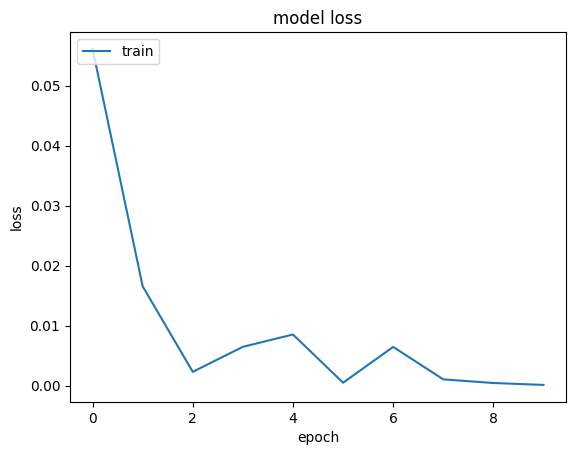

In [ ]:
# Skip the first 10 epochs (index 0 to 9) and start plotting from the 11th epoch (index 10)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Adjusted the legend to include both 'train' and 'val' for clarity
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Get the inputs tokenized from the validation set
inputs = tokenizer.batch_encode_plus(list(test_data),
                                     add_special_tokens=True, max_length=max_length,
                                    padding='max_length',  return_attention_mask=True,
                                    return_token_type_ids=True, truncation=True)

# Extract input_ids and attention mask
inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
               np.asarray(inputs['attention_mask'], dtype='int32')]
valid_preds = bert_model.predict(inputs_valid)
valid_preds = np.argmax(valid_preds, axis=1)


582/582 [==============================] - 53s 86ms/step


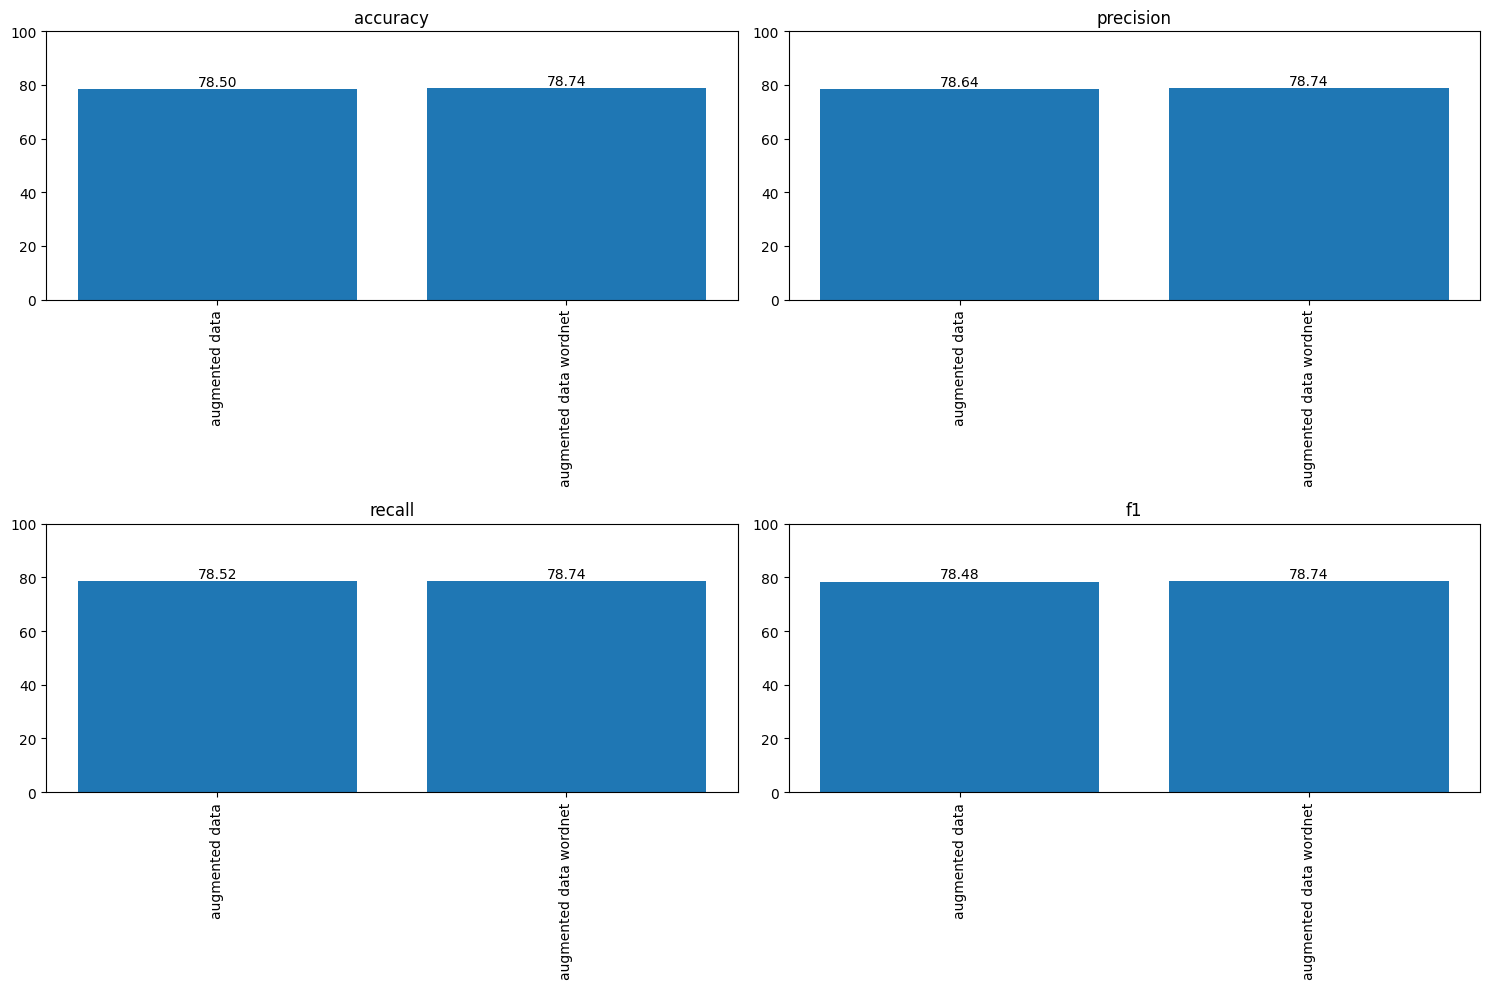

In [ ]:
# get the final metrics
metrics_val.run(test_labels, valid_preds, "augmented data wordnet")
metrics_val.plot()

# Part III

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import numpy as np

# # Define observation shares
# observation_shares = [0.01, 0.10, 0.25, 0.50, 0.75. 1.00]

# # List to store validation predictions for all models
# all_valid_preds = []

# for share in observation_shares:
#     # Calculate the number of observations
#     obs_count = int(len(df_train) * share)

#     # Set the seed for reproducibility
#     np.random.seed(42)

#     # Sample from the DataFrame
#     df_train_sampled = df_train.sample(n=obs_count)

#     # Extract features and labels
#     train_data = df_train_sampled['clean_text']
#     train_labels = df_train_sampled['label']

#     # One-hot encode the labels
#     enc = OneHotEncoder(handle_unknown='ignore')
#     y_train = enc.fit_transform(np.array(train_labels).reshape(-1, 1)).toarray()

#     # Define steps per epoch
#     steps_per_epoch = obs_count // batch_size

#     # Generate batches
#     batches = get_batches(train_data, y_train, tokenizer, batch_size, max_length)

#     # Compile the model
#     bert_model.compile(
#         optimizer=Adam(2e-5),
#         metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
#         loss=tf.keras.losses.CategoricalCrossentropy()
#     )

#     # Train the model
#     bert_model.fit(
#         batches,
#         epochs=7,
#         steps_per_epoch=steps_per_epoch
#     )

#     # Get the inputs tokenized from the validation set
#     inputs = tokenizer.batch_encode_plus(list(validation_data),
#                                          add_special_tokens=True,
#                                          max_length=max_length,
#                                          padding='max_length',
#                                          return_attention_mask=True,
#                                          return_token_type_ids=True,
#                                          truncation=True)

#     # Extract input_ids and attention mask
#     inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
#                     np.asarray(inputs['attention_mask'], dtype='int32')]

#     # Get predictions for the validation set
#     valid_preds = bert_model.predict(inputs_valid)
#     valid_preds = np.argmax(valid_preds, axis=1)

#     # Append predictions to the list
#     all_valid_preds.append(valid_preds)
#     metrics_val.run(validation_labels, valid_preds, f"share_{int(share * 100)}%")


In [149]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define observation shares
observation_shares = [0.01, 0.10, 0.25, 0.50, 0.75, 1.00]

# List to store validation predictions for all models
all_valid_preds = []

# List to store histories for all models
all_histories = []

for share in observation_shares:
    # Calculate the number of observations
    obs_count = int(len(df_train) * share)

    # Set the seed for reproducibility
    np.random.seed(42)

    # Sample from the DataFrame
    df_train_sampled = df_train.sample(n=obs_count)

    # Extract features and labels
    train_data = df_train_sampled['clean_text']
    train_labels = df_train_sampled['label']

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(np.array(train_labels).reshape(-1, 1)).toarray()

    # Get validation data
    # validation_data = df_validation['clean_text']
    # validation_labels = df_validation['label']

    # Convert validation labels to one-hot encoding
    y_valid = enc.transform(np.array(validation_labels).reshape(-1, 1)).toarray()

    # Define steps per epoch
    steps_per_epoch = obs_count // batch_size

    # Generate batches for training data
    train_batches = get_batches(train_data, y_train, tokenizer, batch_size, max_length)

    # Generate batches for validation data
    valid_batches = get_batches(validation_data, y_valid, tokenizer, batch_size, max_length)

    # Compile the model
    bert_model.compile(
        optimizer=Adam(2e-5),
        metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
        loss=tf.keras.losses.CategoricalCrossentropy()
    )

    # Train the model and record the history
    history = bert_model.fit(
        train_batches,
        epochs=7,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batches,
        validation_steps=len(validation_data) // batch_size
    )

    # Append the history to the list
    all_histories.append(history)

    # Get the inputs tokenized from the validation set
    inputs = tokenizer.batch_encode_plus(list(test_data),
                                         add_special_tokens=True,
                                         max_length=max_length,
                                         padding='max_length',
                                         return_attention_mask=True,
                                         return_token_type_ids=True,
                                         truncation=True)

    # Extract input_ids and attention mask
    inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
                    np.asarray(inputs['attention_mask'], dtype='int32')]

    # Get predictions for the validation set
    valid_preds = bert_model.predict(inputs_valid)
    valid_preds = np.argmax(valid_preds, axis=1)

    # Append predictions to the list
    all_valid_preds.append(valid_preds)
    metrics_val.run(test_labels, valid_preds, f"share_{int(share * 100)}%")


Epoch 1/7


11/11 [==============================] - 70s 3s/step - loss: 0.8453 - recall_4: 0.8182 - precision_4: 0.8182 - val_loss: 0.6282 - val_recall_4: 0.7885 - val_precision_4: 0.7885
Epoch 2/7
11/11 [==============================] - 28s 3s/step - loss: 0.4341 - recall_4: 0.8410 - precision_4: 0.8410 - val_loss: 0.4634 - val_recall_4: 0.8190 - val_precision_4: 0.8190
Epoch 3/7
11/11 [==============================] - 27s 3s/step - loss: 0.2913 - recall_4: 0.8991 - precision_4: 0.8991 - val_loss: 0.4733 - val_recall_4: 0.8246 - val_precision_4: 0.8246
Epoch 4/7
11/11 [==============================] - 27s 3s/step - loss: 0.1831 - recall_4: 0.9205 - precision_4: 0.9205 - val_loss: 0.5626 - val_recall_4: 0.8261 - val_precision_4: 0.8261
Epoch 5/7
11/11 [==============================] - 27s 3s/step - loss: 0.1562 - recall_4: 0.9602 - precision_4: 0.9602 - val_loss: 0.5876 - val_recall_4: 0.8203 - val_precision_4: 0.8203
Epoch 6/7
11/11 [==============================] - 27s 3s/step - loss: 0.09

112/112 [==============================] - 96s 529ms/step - loss: 0.4287 - recall_5: 0.8242 - precision_5: 0.8242 - val_loss: 0.3706 - val_recall_5: 0.8404 - val_precision_5: 0.8404
Epoch 2/7
112/112 [==============================] - 54s 484ms/step - loss: 0.3195 - recall_5: 0.8713 - precision_5: 0.8713 - val_loss: 0.3907 - val_recall_5: 0.8438 - val_precision_5: 0.8438
Epoch 3/7
112/112 [==============================] - 54s 485ms/step - loss: 0.2006 - recall_5: 0.9246 - precision_5: 0.9246 - val_loss: 0.5102 - val_recall_5: 0.8382 - val_precision_5: 0.8382
Epoch 4/7
112/112 [==============================] - 54s 484ms/step - loss: 0.0971 - recall_5: 0.9650 - precision_5: 0.9650 - val_loss: 0.7873 - val_recall_5: 0.8420 - val_precision_5: 0.8420
Epoch 5/7
112/112 [==============================] - 54s 484ms/step - loss: 0.0559 - recall_5: 0.9784 - precision_5: 0.9784 - val_loss: 0.9268 - val_recall_5: 0.8331 - val_precision_5: 0.8331
Epoch 6/7
112/112 [==============================]

281/281 [==============================] - 140s 370ms/step - loss: 0.3234 - recall_6: 0.8857 - precision_6: 0.8857 - val_loss: 0.3690 - val_recall_6: 0.8449 - val_precision_6: 0.8449
Epoch 2/7
281/281 [==============================] - 99s 353ms/step - loss: 0.2329 - recall_6: 0.9137 - precision_6: 0.9137 - val_loss: 0.4287 - val_recall_6: 0.8498 - val_precision_6: 0.8498
Epoch 3/7
281/281 [==============================] - 99s 352ms/step - loss: 0.1440 - recall_6: 0.9500 - precision_6: 0.9500 - val_loss: 0.5167 - val_recall_6: 0.8351 - val_precision_6: 0.8351
Epoch 4/7
281/281 [==============================] - 99s 351ms/step - loss: 0.0862 - recall_6: 0.9684 - precision_6: 0.9684 - val_loss: 0.6756 - val_recall_6: 0.8405 - val_precision_6: 0.8405
Epoch 5/7
281/281 [==============================] - 99s 352ms/step - loss: 0.0525 - recall_6: 0.9808 - precision_6: 0.9808 - val_loss: 0.7818 - val_recall_6: 0.8372 - val_precision_6: 0.8372
Epoch 6/7
281/281 [==============================

562/562 [==============================] - 215s 317ms/step - loss: 0.2659 - recall_7: 0.9071 - precision_7: 0.9071 - val_loss: 0.3869 - val_recall_7: 0.8509 - val_precision_7: 0.8509
Epoch 2/7
562/562 [==============================] - 173s 308ms/step - loss: 0.1739 - recall_7: 0.9393 - precision_7: 0.9393 - val_loss: 0.4242 - val_recall_7: 0.8508 - val_precision_7: 0.8508
Epoch 3/7
562/562 [==============================] - 173s 308ms/step - loss: 0.0979 - recall_7: 0.9653 - precision_7: 0.9653 - val_loss: 0.6265 - val_recall_7: 0.8454 - val_precision_7: 0.8454
Epoch 4/7
562/562 [==============================] - 173s 308ms/step - loss: 0.0591 - recall_7: 0.9799 - precision_7: 0.9799 - val_loss: 0.7746 - val_recall_7: 0.8318 - val_precision_7: 0.8318
Epoch 5/7
562/562 [==============================] - 173s 308ms/step - loss: 0.0464 - recall_7: 0.9839 - precision_7: 0.9839 - val_loss: 0.6649 - val_recall_7: 0.8497 - val_precision_7: 0.8497
Epoch 6/7
562/562 [==========================

843/843 [==============================] - 289s 300ms/step - loss: 0.1890 - recall_8: 0.9379 - precision_8: 0.9379 - val_loss: 0.4481 - val_recall_8: 0.8469 - val_precision_8: 0.8469
Epoch 2/7
843/843 [==============================] - 248s 294ms/step - loss: 0.1074 - recall_8: 0.9644 - precision_8: 0.9644 - val_loss: 0.4615 - val_recall_8: 0.8459 - val_precision_8: 0.8459
Epoch 3/7
843/843 [==============================] - 248s 294ms/step - loss: 0.0643 - recall_8: 0.9789 - precision_8: 0.9789 - val_loss: 0.5479 - val_recall_8: 0.8382 - val_precision_8: 0.8382
Epoch 4/7
843/843 [==============================] - 248s 294ms/step - loss: 0.0434 - recall_8: 0.9849 - precision_8: 0.9849 - val_loss: 0.7542 - val_recall_8: 0.8422 - val_precision_8: 0.8422
Epoch 5/7
843/843 [==============================] - 248s 294ms/step - loss: 0.0381 - recall_8: 0.9872 - precision_8: 0.9872 - val_loss: 1.0197 - val_recall_8: 0.8365 - val_precision_8: 0.8365
Epoch 6/7
843/843 [==========================

1124/1124 [==============================] - 367s 292ms/step - loss: 0.1537 - recall_9: 0.9512 - precision_9: 0.9512 - val_loss: 0.4303 - val_recall_9: 0.8526 - val_precision_9: 0.8526
Epoch 2/7
1124/1124 [==============================] - 323s 287ms/step - loss: 0.0898 - recall_9: 0.9721 - precision_9: 0.9721 - val_loss: 0.5040 - val_recall_9: 0.8470 - val_precision_9: 0.8470
Epoch 3/7
1124/1124 [==============================] - 323s 287ms/step - loss: 0.0564 - recall_9: 0.9818 - precision_9: 0.9818 - val_loss: 0.5997 - val_recall_9: 0.8503 - val_precision_9: 0.8503
Epoch 4/7
1124/1124 [==============================] - 323s 287ms/step - loss: 0.0387 - recall_9: 0.9874 - precision_9: 0.9874 - val_loss: 0.8006 - val_recall_9: 0.8487 - val_precision_9: 0.8487
Epoch 5/7
1124/1124 [==============================] - 323s 287ms/step - loss: 0.0342 - recall_9: 0.9883 - precision_9: 0.9883 - val_loss: 0.8463 - val_recall_9: 0.8348 - val_precision_9: 0.8348
Epoch 6/7
1124/1124 [==============

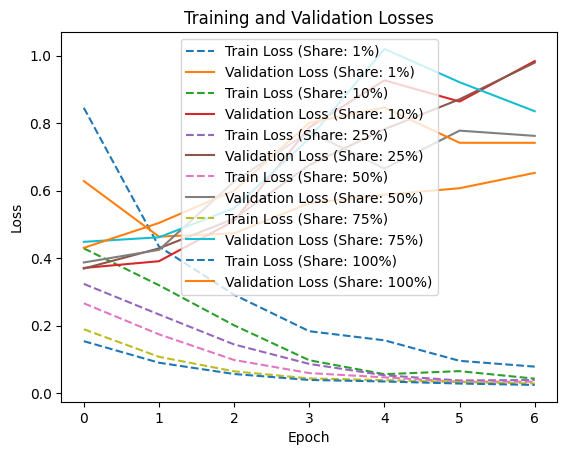

In [152]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot losses for all histories
for i, history in enumerate(all_histories):
    # Extract training and validation losses
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation losses
    ax.plot(train_loss, label=f'Train Loss (Share: {int(observation_shares[i] * 100)}%)', linestyle='--')
    ax.plot(val_loss, label=f'Validation Loss (Share: {int(observation_shares[i] * 100)}%)')

# Set title and labels
ax.set_title('Training and Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()


In [166]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define observation shares
observation_shares = [0.10]

# List to store validation predictions for all models
all_valid_preds = []

# List to store histories for all models
all_histories = []

for share in observation_shares:
    # Calculate the number of observations
    obs_count = int(len(df_train) * share)

    # Set the seed for reproducibility
    np.random.seed(42)

    # Sample from the DataFrame
    df_train_sampled = df_train.sample(n=obs_count)

    # Extract features and labels
    train_data = df_train_sampled['clean_text']
    train_labels = df_train_sampled['label']

    # One-hot encode the labels
    enc = OneHotEncoder(handle_unknown='ignore')
    y_train = enc.fit_transform(np.array(train_labels).reshape(-1, 1)).toarray()

    # Get validation data
    # validation_data = df_validation['clean_text']
    # validation_labels = df_validation['label']

    # Convert validation labels to one-hot encoding
    y_valid = enc.transform(np.array(validation_labels).reshape(-1, 1)).toarray()

    # Define steps per epoch
    steps_per_epoch = obs_count // batch_size

    # Generate batches for training data
    train_batches = get_batches(train_data, y_train, tokenizer, batch_size, max_length)

    # Generate batches for validation data
    valid_batches = get_batches(validation_data, y_valid, tokenizer, batch_size, max_length)

    # Compile the model
    bert_model.compile(
        optimizer=Adam(learning_rate=2e-5),
        metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()],
        loss=tf.keras.losses.CategoricalCrossentropy()
    )

    # Train the model and record the history
    history = bert_model.fit(
        train_batches,
        epochs=7,
        steps_per_epoch=steps_per_epoch,
        validation_data=valid_batches,
        validation_steps=len(validation_data) // batch_size
    )

    # Append the history to the list
    all_histories.append(history)

    # Get the inputs tokenized from the validation set
    inputs = tokenizer.batch_encode_plus(list(test_data),
                                         add_special_tokens=True,
                                         max_length=max_length,
                                         padding='max_length',
                                         return_attention_mask=True,
                                         return_token_type_ids=True,
                                         truncation=True)

    # Extract input_ids and attention mask
    inputs_valid = [np.asarray(inputs['input_ids'], dtype='int32'),
                    np.asarray(inputs['attention_mask'], dtype='int32')]

    # Get predictions for the validation set
    valid_preds = bert_model.predict(inputs_valid)
    valid_preds = np.argmax(valid_preds, axis=1)

    # Append predictions to the list
    all_valid_preds.append(valid_preds)
    metrics_val.run(test_labels, valid_preds, f"share_{int(share * 100)}%")

Epoch 1/7


ResourceExhaustedError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 638, in apply_gradients
        self.build(trainable_variables)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/adam.py", line 145, in build
        self.add_variable_from_reference(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 1125, in add_variable_from_reference
        return super().add_variable_from_reference(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 508, in add_variable_from_reference
        initial_value = tf.zeros(
    File "/usr/local/lib/python3.10/dist-packages/tensorflow/dtensor/python/api.py", line 64, in call_with_layout
        return fn(*args, **kwargs)

    ResourceExhaustedError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[768,3072] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill] name: 


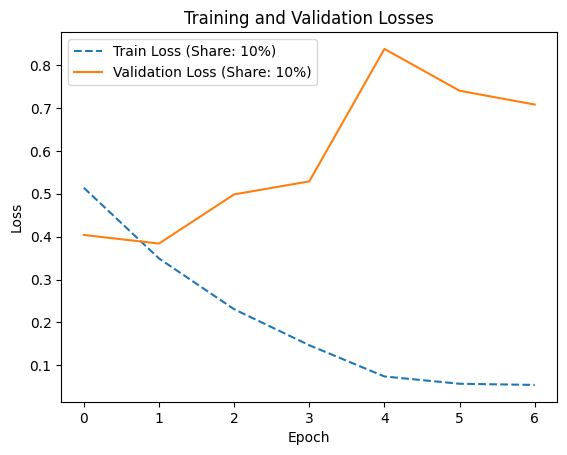

In [160]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot losses for all histories
for i, history in enumerate(all_histories):
    # Extract training and validation losses
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation losses
    ax.plot(train_loss, label=f'Train Loss (Share: {int(observation_shares[i] * 100)}%)', linestyle='--')
    ax.plot(val_loss, label=f'Validation Loss (Share: {int(observation_shares[i] * 100)}%)')

# Set title and labels
ax.set_title('Training and Validation Losses')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

# Show plot
plt.show()

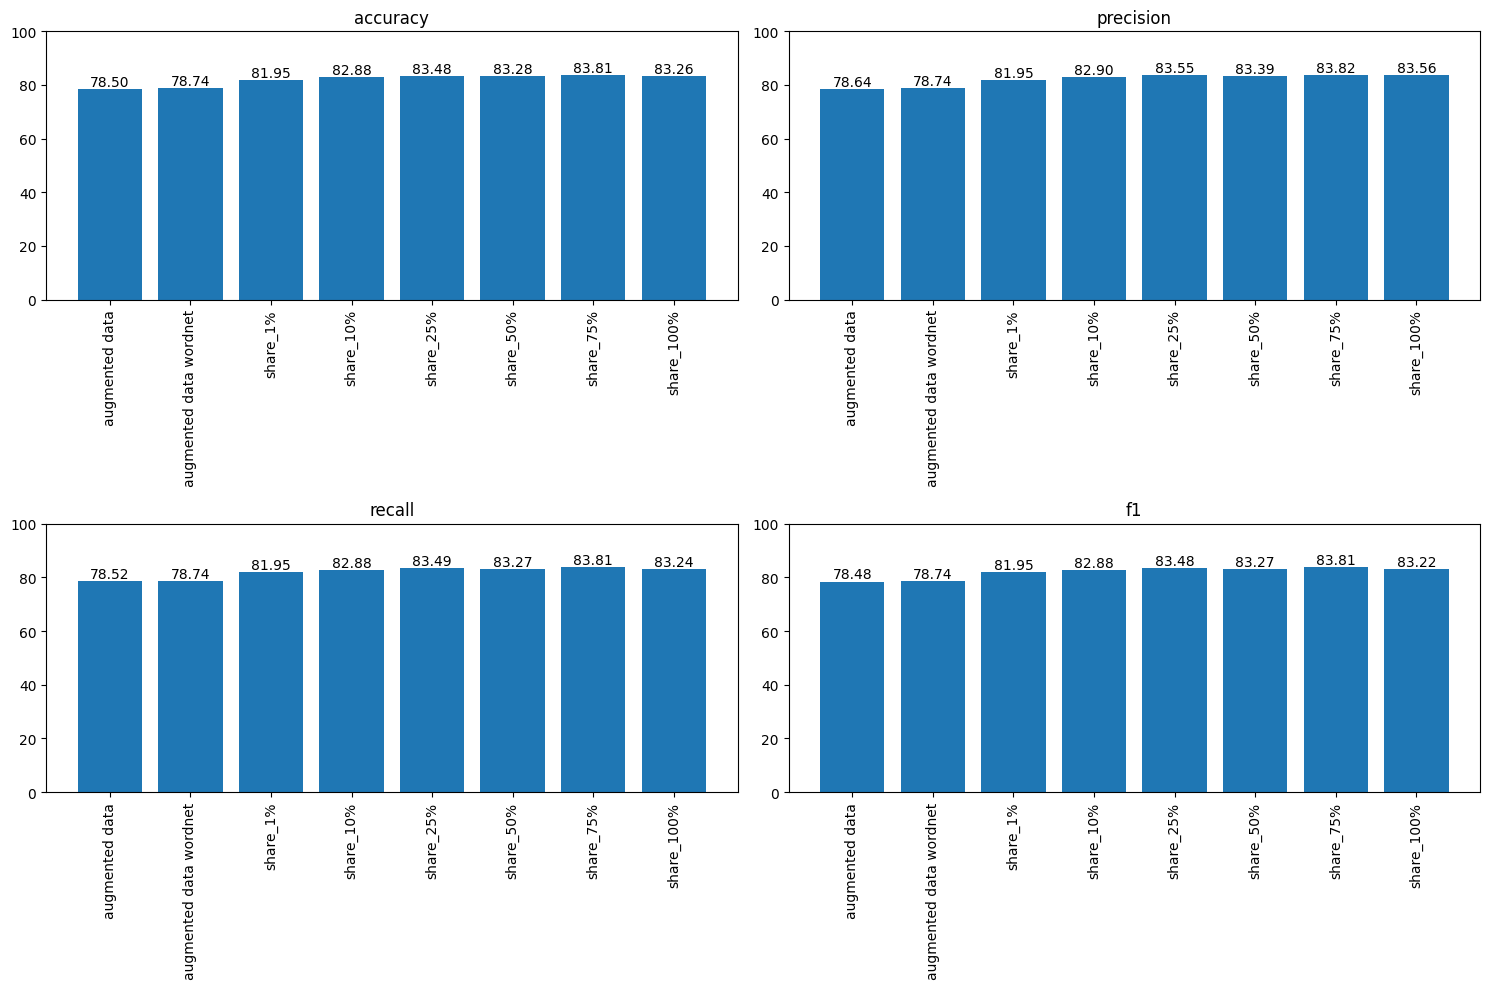

In [162]:
metrics_val.plot()